# Decision Tree

In [1]:

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

import sys
sys.path.append("/home/alvaro/Desktop/MachineLearning/PracticalApplications/1-3/my-staff")
from utils import load_ds

# Cargar dataset

In [2]:
X, y, features_names, class_names = load_ds("all_encoded_cirrhosis")
X.shape

(293, 25)

## Split

In [3]:
from sklearn.model_selection import train_test_split
from globals import TEST_SIZE, SEED

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                y,
                                                                test_size=TEST_SIZE,
                                                                random_state=SEED)

print(len(X_train), len(X_test))

205 88


# Busqueda de hiperparametros

Hace un 5-fold y dice que parametros son los mejores


In [5]:
from sklearn.model_selection import GridSearchCV
from globals import SEED

In [6]:
# Definir los posibles valores de los parámetros
param_grid = {
    'max_depth': [None, 4, 8, 10],
    'min_samples_split': [2, 8, 16, 32],
    'min_samples_leaf': [2, 8, 16, 32, 48],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=SEED),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

In [7]:
grid_search.fit(X, y)

# Mostrar los mejores parámetros y el mejor rendimiento
params = grid_search.best_params_
print("Best params:", params)
print("Best score:", grid_search.best_score_)

Best params: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8}
Best score: 0.7231443600233781


# Creación del modelo


In [8]:
clf = DecisionTreeClassifier(random_state=SEED,
                             max_depth=params["max_depth"],
                             max_features=params["max_features"],
                             min_samples_leaf=params["min_samples_leaf"],
                             min_samples_split=params["min_samples_split"])

# Entrenamiento del modelo

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=8, random_state=8)

# Visualización del modelo

In [10]:
from sklearn.tree import plot_tree


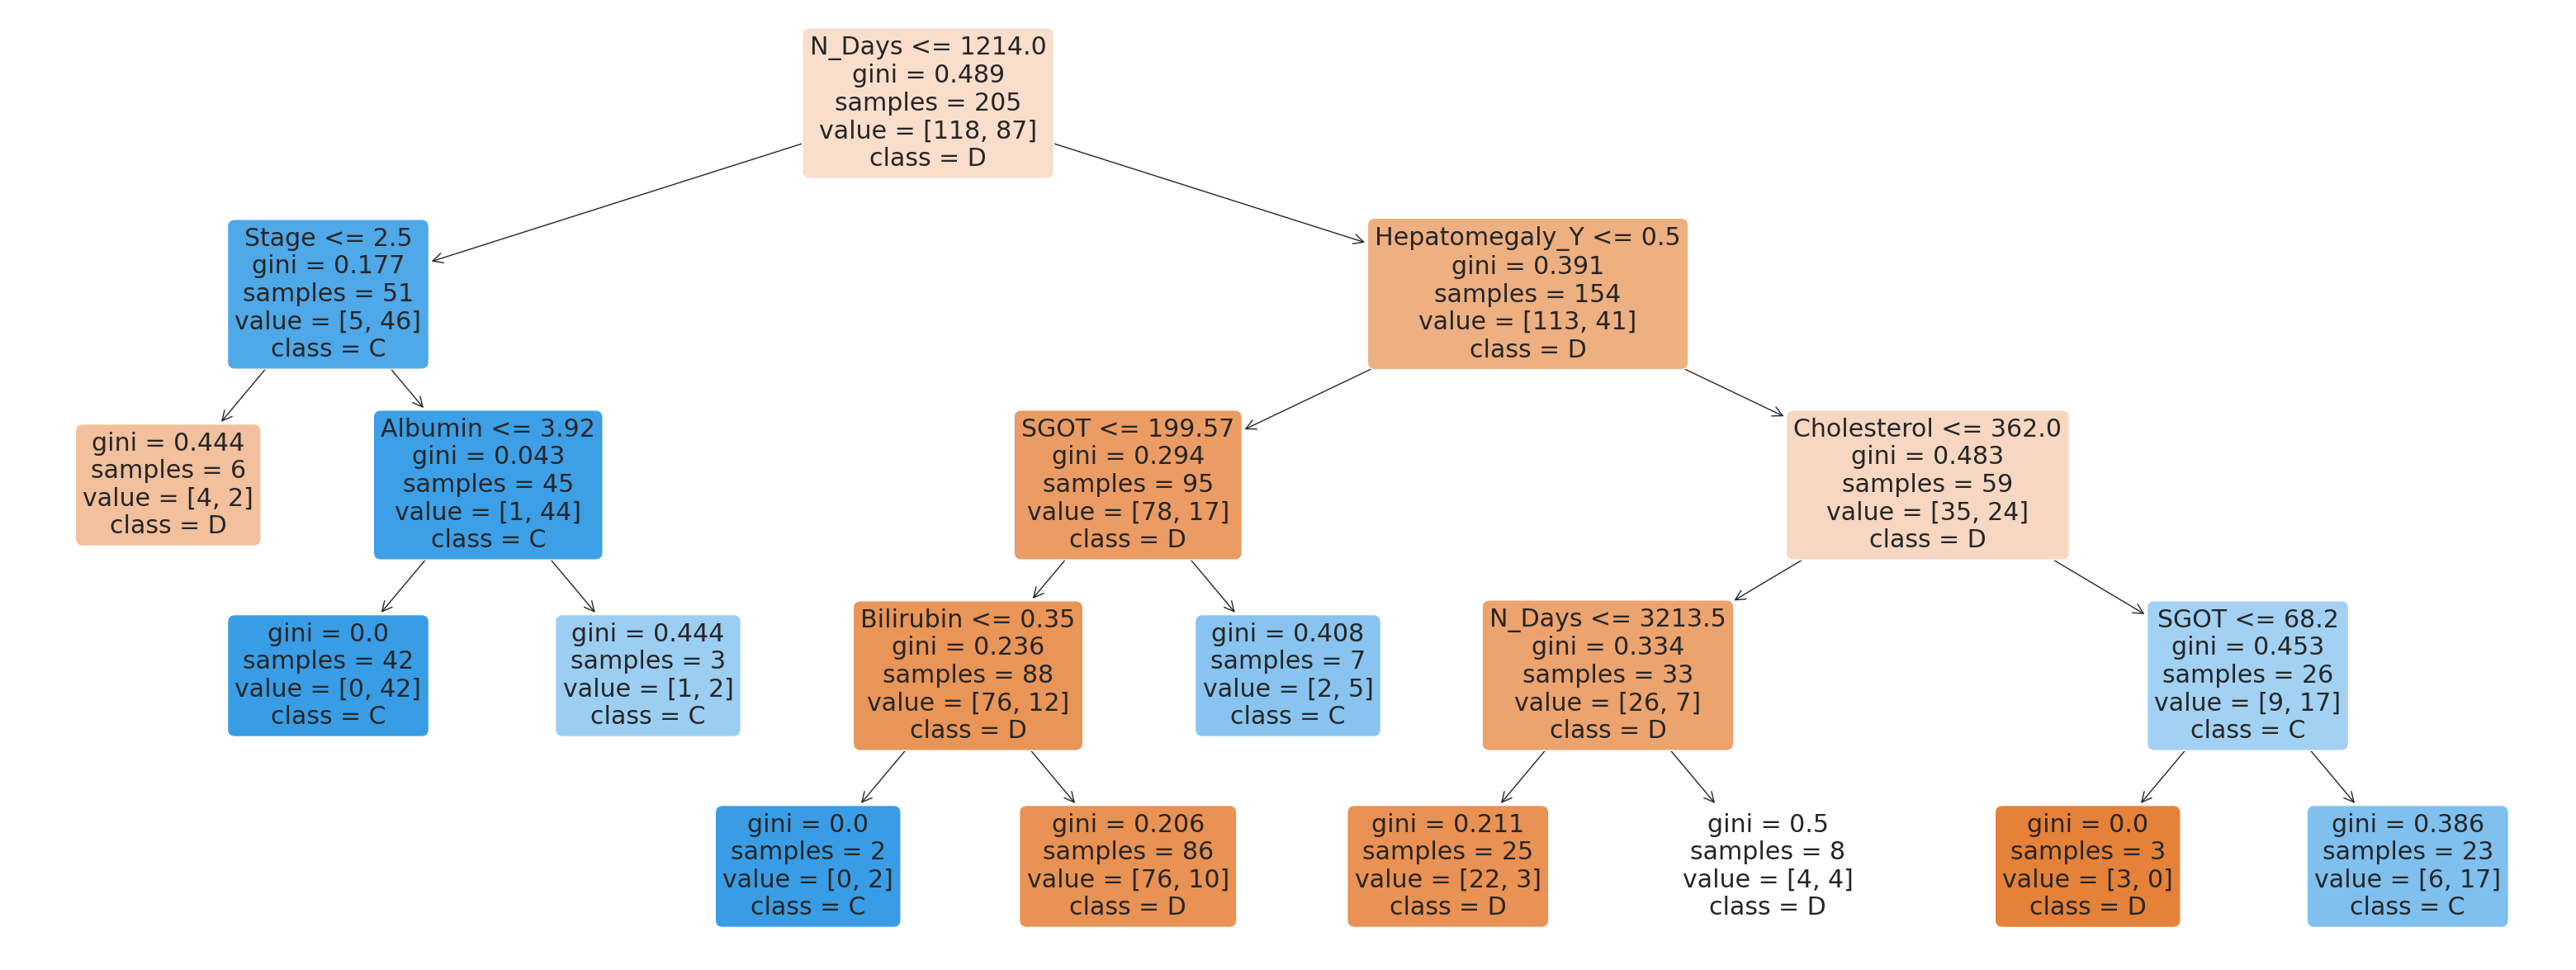

In [11]:
# Pintamos el árbol para sacar conclusiones
plt.figure(figsize=(40, 15))
plot_tree(clf, filled=True, feature_names=features_names, class_names=class_names, rounded=True)
plt.show()

In [12]:
print("Número de nodos en el árbol de decisión:", clf.tree_.node_count)
print("Número de hojas", clf.get_n_leaves())

Número de nodos en el árbol de decisión: 19
Número de hojas 10


# Evaluación del modelo

In [13]:
print("Training score: ", clf.score(X_train, y_train))
print("Test score: ", clf.score(X_test, y_test))

Training score:  0.8634146341463415
Test score:  0.7840909090909091


# Show report

In [75]:
from utils import show_report, eval_model


In [77]:
y_pred = clf.predict(X_test)
show_report(y_test, y_pred)

{'0': {'precision': 0.7719298245614035, 'recall': 0.88, 'f1-score': 0.822429906542056, 'support': 50.0}, '1': {'precision': 0.8064516129032258, 'recall': 0.6578947368421053, 'f1-score': 0.7246376811594202, 'support': 38.0}, 'accuracy': 0.7840909090909091, 'macro avg': {'precision': 0.7891907187323146, 'recall': 0.7689473684210526, 'f1-score': 0.7735337938507381, 'support': 88.0}, 'weighted avg': {'precision': 0.7868369604362813, 'recall': 0.7840909090909091, 'f1-score': 0.7802014455813723, 'support': 88.0}}
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        50
           1       0.81      0.66      0.72        38

    accuracy                           0.78        88
   macro avg       0.79      0.77      0.77        88
weighted avg       0.79      0.78      0.78        88



In [16]:
eval_model(y_test, y_pred)

Métricas de evaluación:
Precision: 0.7868
Recall: 0.7841
F1-score: 0.7802


# Visualización de características principales

In [17]:
def main_features(clf, feature_names):
    importance = clf.feature_importances_
    # summarize feature importance

    #for i, v in enumerate(importance):
    #    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

    # plot feature importance
    #plt.figure(figsize=(20, 10))

    plt.title('Caracteristicas principales')  # Agregar título al gráfico
    plt.barh([x for x in range(len(importance))], importance, tick_label=feature_names)
    #plt.xticks(rotation=90)
    plt.show()

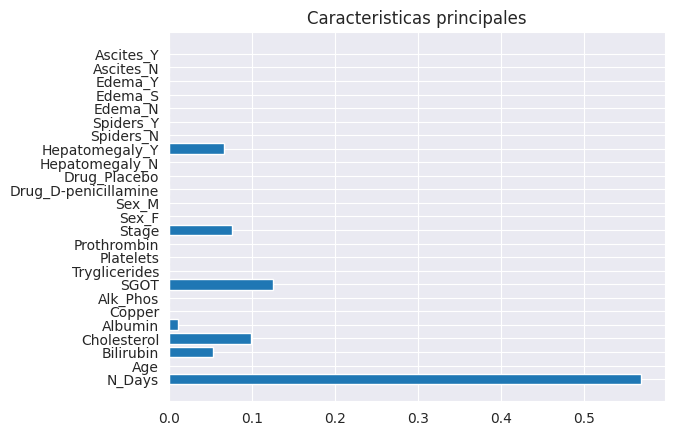

In [18]:
main_features(clf, features_names)